# Credit Card dataset

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [5]:
cc = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/creditcard.csv')

In [6]:
cc.shape

(284807, 31)

In [7]:
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
cc.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [10]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# check for missing values

cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
#plt.figure(figsize=(27,15))
#c = cc.corr()
#sns.heatmap(c, cmap="BrBG", annot =True)

Text(0.5, 1.0, 'Number of Examples Per Class')

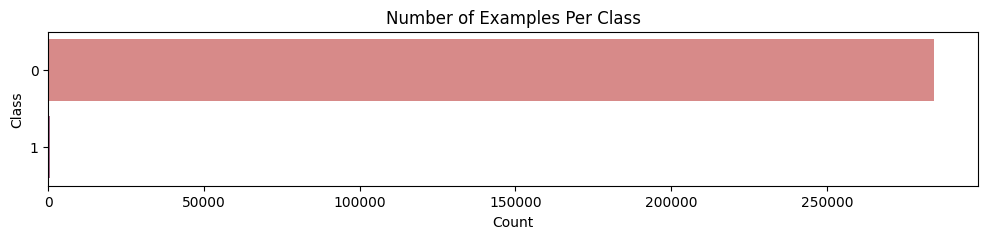

In [12]:
plt.figure(figsize=(12,2))
sns.countplot(y=cc['Class'], palette="flare", alpha=0.8)
plt.xlabel('Count')
plt.title('Number of Examples Per Class')

In [19]:
cc_1_492 = cc[cc['Class'] == 1]

In [20]:
cc_0_284K = cc[cc['Class'] == 0]

In [21]:
cc_0_500 = cc_0_284K.iloc[0:500]

In [22]:
cc_0_500

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,365.0,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.214920,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,0
496,366.0,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,0.068753,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,0
497,366.0,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.140624,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,0
498,367.0,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.303927,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,0


In [23]:
cc_data = pd.concat([cc_1_492, cc_0_500])

In [24]:
cc_data.reset_index(drop=True, inplace=True)

In [25]:
cc_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,365.0,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.214920,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,0
988,366.0,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,0.068753,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,0
989,366.0,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.140624,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,0
990,367.0,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.303927,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,0


In [13]:
data = cc_data

Text(0.5, 1.0, 'Number of Examples Per Class')

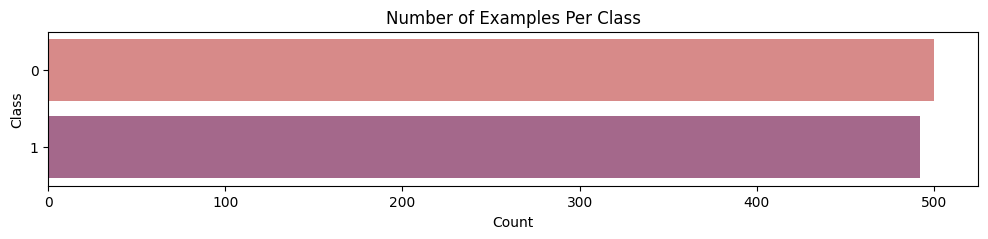

In [27]:
plt.figure(figsize=(12,2))
sns.countplot(y=cc_data['Class'], palette="flare", alpha=0.8)
plt.xlabel('Count')
plt.title('Number of Examples Per Class')

In [14]:
data = cc

## Split the training and testing data

In [15]:
# last column is the target
# 1 = anomaly, 0 = normal
TARGET = 'Class'

features = data.drop('Class', axis=1)
target = data['Class']

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

In [16]:
# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [17]:
train_index

Int64Index([ 45732,   6338, 195383, 152295, 151103, 150665,  75511, 189878,
             73784, 102782,
            ...
             50211,  30496,  16863,  46998,   8845,  88876,   9252, 143334,
            122479, 258403],
           dtype='int64', length=394)

In [18]:
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
45732,42474.0,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,0.054796,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00
195383,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,1.277315,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21
152295,97235.0,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,...,1.925103,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,9.82
151103,94625.0,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,...,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,33.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88876,62330.0,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.067712,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00
9252,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00
122479,76575.0,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,-2.921484,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,219.80


## Scale the data using MinMaxScaler

In [19]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [32]:
x_train_scaled

array([[2.48100967e-01, 8.14349978e-01, 3.86648367e-01, ...,
        7.75784181e-01, 4.56672694e-01, 6.64482733e-04],
       [4.21384761e-02, 9.44462386e-01, 4.00895491e-01, ...,
        7.54407839e-01, 6.22645595e-01, 6.64482733e-04],
       [7.70334985e-01, 9.49257470e-01, 2.35214242e-01, ...,
        6.92684706e-01, 5.52002047e-01, 4.80560558e-01],
       ...,
       [5.00583864e-01, 7.14648007e-01, 3.88187463e-01, ...,
        8.35898765e-01, 4.37723673e-01, 0.00000000e+00],
       [4.49215617e-01, 7.58686640e-01, 3.90112365e-01, ...,
        6.83407311e-01, 6.38268026e-01, 1.46053305e-01],
       [9.33191791e-01, 7.47624110e-01, 3.95659452e-02, ...,
        7.58961808e-01, 2.28901730e-01, 1.96686889e-01]])

In [33]:
x_test_scaled

array([[0.39625501, 0.96683094, 0.23239246, ..., 0.70628021, 0.52906854,
        0.10963965],
       [0.69112998, 0.98969888, 0.28149707, ..., 0.70704115, 0.50926578,
        0.00907019],
       [0.01970984, 0.97636996, 0.26196767, ..., 0.70194978, 0.51875341,
        0.03128385],
       ...,
       [0.42188016, 0.96110014, 0.2364231 , ..., 0.69696171, 0.52352463,
        0.19203551],
       [0.87390304, 0.99895899, 0.28082753, ..., 0.69848543, 0.50020147,
        0.00118942],
       [0.08301486, 0.90017351, 0.26881751, ..., 0.70036412, 0.57632735,
        0.02591483]])

### Build an AutoEncoder model

In [20]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units

  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [21]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0261 - mse: 0.0576 - val_loss: 0.0360 - val_mse: 0.0846
Epoch 2/20
1/1 [==============================] - 0s 141ms/step - loss: 0.0259 - mse: 0.0573 - val_loss: 0.0358 - val_mse: 0.0840
Epoch 3/20
1/1 [==============================] - 0s 151ms/step - loss: 0.0257 - mse: 0.0569 - val_loss: 0.0355 - val_mse: 0.0833
Epoch 4/20
1/1 [==============================] - 0s 166ms/step - loss: 0.0256 - mse: 0.0565 - val_loss: 0.0351 - val_mse: 0.0826
Epoch 5/20
1/1 [==============================] - 0s 167ms/step - loss: 0.0254 - mse: 0.0561 - val_loss: 0.0347 - val_mse: 0.0816
Epoch 6/20
1/1 [==============================] - 0s 169ms/step - loss: 0.0252 - mse: 0.0557 - val_loss: 0.0343 - val_mse: 0.0806
Epoch 7/20
1/1 [==============================] - 0s 137ms/step - loss: 0.0250 - mse: 0.0551 - val_loss: 0.0337 - val_mse: 0.0793
Epoch 8/20
1/1 [==============================] - 0s 167ms/step - loss: 0.0247 - mse: 0.0546 

## Plot history

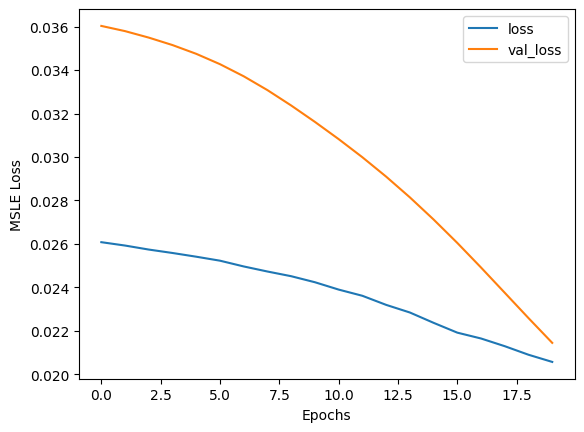

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Find threshold

In [23]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, x_train_scaled):
  # another method to find threshold
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [24]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold method one: {threshold}")

threshold_2 = find_threshold_method_two(model, x_train_scaled)
print(f"Threshold method two: {threshold_2}")

13/13 [==============================] - 0s 981us/step
Threshold method one: 0.028203648667648188
13/13 [==============================] - 0s 1ms/step
Threshold method two: 0.03409997332463198


In [25]:
preds = get_predictions(model, x_test_scaled, threshold)
accuracy_score(preds, y_test)

1781/1781 [==============================] - 2s 1ms/step


0.018784452793090132

## Tuning AutoEncoder using keras tuner

In [26]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.9 MB/s eta 0:00:00


In [27]:
import kerastuner as kt

class AutoEncoderTuner(Model):

  def __init__(self, hp, output_units, code_size=8):
    super().__init__()
    dense_1_units = hp.Int('dense_1_units', min_value=16, max_value=72, step=4)
    dense_2_units = hp.Int('dense_2_units', min_value=16, max_value=72, step=4)
    dense_3_units = hp.Int('dense_3_units', min_value=16, max_value=72, step=4)
    dense_4_units = hp.Int('dense_4_units', min_value=16, max_value=72, step=4)
    dense_5_units = hp.Int('dense_5_units', min_value=16, max_value=72, step=4)
    dense_6_units = hp.Int('dense_6_units', min_value=16, max_value=72, step=4)

    self.encoder = Sequential([
      Dense(dense_1_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_2_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_3_units, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(dense_4_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_5_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_6_units, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


def build_model(hp):
  model = AutoEncoderTuner(hp, 30)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(
      loss='msle',
      optimizer=Adam(learning_rate=hp_learning_rate),
  )
  return model

Using TensorFlow backend


<ipython-input-27-05d57925f353>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [28]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='autoencoder',
    project_name='tuning_autoencoder6'
)

tuner.search(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Trial 30 Complete [00h 00m 06s]
val_loss: 0.02582521364092827

Best val_loss So Far: 0.005659562535583973
Total elapsed time: 00h 02m 07s


In [29]:
hparams = [f'dense_{i}_units' for i in range(1,7)] + ['learning_rate']
best_hyperparams = tuner.get_best_hyperparameters()
for hps in hparams:
  print(f"{hps}: {best_hyperparams[0][hps]}")

dense_1_units: 36
dense_2_units: 68
dense_3_units: 36
dense_4_units: 44
dense_5_units: 40
dense_6_units: 36
learning_rate: 0.01


In [30]:
best_model = tuner.get_best_models()[0]
best_model.compile(loss='msle', optimizer=Adam(0.001))

best_model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.0122 - val_loss: 0.0059
Epoch 2/20
1/1 [==============================] - 0s 169ms/step - loss: 0.0119 - val_loss: 0.0060
Epoch 3/20
1/1 [==============================] - 0s 144ms/step - loss: 0.0119 - val_loss: 0.0059
Epoch 4/20
1/1 [==============================] - 0s 174ms/step - loss: 0.0119 - val_loss: 0.0058
Epoch 5/20
1/1 [==============================] - 0s 167ms/step - loss: 0.0118 - val_loss: 0.0058
Epoch 6/20
1/1 [==============================] - 0s 165ms/step - loss: 0.0119 - val_loss: 0.0058
Epoch 7/20
1/1 [==============================] - 0s 151ms/step - loss: 0.0116 - val_loss: 0.0059
Epoch 8/20
1/1 [==============================] - 0s 145ms/step - loss: 0.0117 - val_loss: 0.0060
Epoch 9/20
1/1 [==============================] - 0s 167ms/step - loss: 0.0117 - val_loss: 0.0060
Epoch 10/20
1/1 [==============================] - 0s 145ms/step - loss: 0.0114 - val_loss: 0.0061
Epoch 11/20
1/1 [=====

In [31]:
threshold_ = find_threshold(best_model, x_train_scaled)
preds_ = get_predictions(best_model, x_test_scaled, threshold_)
accuracy_score(preds_, y_test)

1781/1781 [==============================] - 2s 894us/step


0.00944489308661915

## Isolation forest

In [48]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [60]:
cc.columns
#specify the column names to be modelled
to_model_columns=cc.columns[0:30]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=float(.1), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(cc[to_model_columns])
pred = clf.predict(cc[to_model_columns])
cc['anomaly']=pred
outliers=cc.loc[cc['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(cc['anomaly'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    256326
-1     28481
Name: anomaly, dtype: int64


In [61]:
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,anomaly
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-1
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0,-1
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,-1
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0,-1
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0,-1
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,-1
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-1


## Normalize and fit the metrics to a PCA to reduce the number of dimensions and then plot them

In [66]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from mpl_toolkits.mplot3d import Axes3D
# pca = PCA(n_components=3)  # Reduce to k=3 dimensions
# scaler = StandardScaler()

# #normalize the metrics
# X = scaler.fit_transform(cc[to_model_columns])
# X_reduce = pca.fit_transform(X)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.set_zlabel("x_composite_3")

# # Plot the compressed data points
# ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# # Plot x's for the ground truth outliers
# ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
#            lw=2, s=60, marker="x", c="red", label="outliers")
# ax.legend()
# plt.show()

## Plotting the features fed to a PCA reduced to 2 dimensions

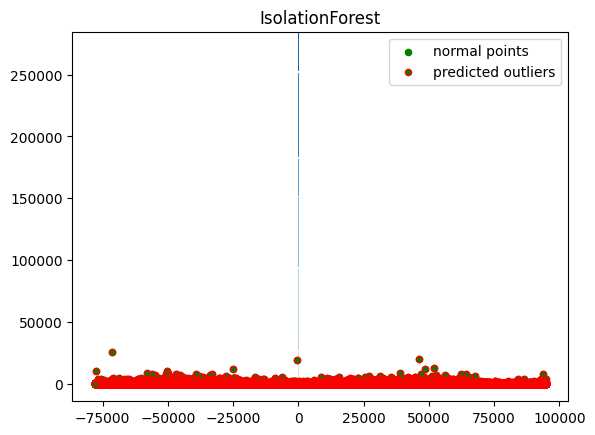

In [58]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(cc[to_model_columns])
res=pd.DataFrame(pca.transform(cc[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [64]:
res[1]

0          55.979467
1         -90.953660
2         285.024840
3          29.859853
4         -23.652028
             ...    
284802    -83.234357
284803    -59.208747
284804    -16.118680
284805    -73.998715
284806    133.004366
Name: 1, Length: 284807, dtype: float64

In [67]:
res[0]

0         94813.862881
1         94813.854640
2         94812.875662
3         94812.861396
4         94811.858408
              ...     
284802   -77972.145224
284803   -77973.143811
284804   -77974.141489
284805   -77974.144652
284806   -77978.133114
Name: 0, Length: 284807, dtype: float64

In [69]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.2 MB/s eta 0:00:00


In [70]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.plotly as py
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

def plot_anomaly(df,metric_name):
    df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y%m%d")
    dates = df.load_date
    #identify the anomaly points and create a array of its values for plot
    bool_array = (abs(df['anomaly']) > 0)
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #A dictionary for conditional format table based on anomaly
    color_map = {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "red"}

    #Table which includes Date,Actuals,Change occured from previous point
    table = go.Table(
        domain=dict(x=[0, 1],
                    y=[0, 0.3]),
        columnwidth=[1, 2],
        # columnorder=[0, 1, 2,],
        header=dict(height=20,
                    values=[['<b>Date</b>'], ['<b>Actual Values </b>'], ['<b>% Change </b>'],
                            ],
                    font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                    fill=dict(color='#d562be')),
        cells=dict(values=[df.round(3)[k].tolist() for k in ['load_date', 'actuals', 'percentage_change']],
                   line=dict(color='#506784'),
                   align=['center'] * 5,
                   font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                   # format = [None] + [",.4f"] + [',.4f'],
                   # suffix=[None] * 4,
                   suffix=[None] + [''] + [''] + ['%'] + [''],
                   height=27,
                   fill=dict(color=[test_df['anomaly_class'].map(color_map)],#map based on anomaly level from dictionary
                   )
                   )
        )
    #Plot the actuals points
    Actuals = go.Scatter(name='Actuals',
                         x=dates,
                         y=df['actuals'],
                         xaxis='x1', yaxis='y1',
                         mode='line',
                         marker=dict(size=12,
                                     line=dict(width=1),
                                     color="blue")
                         )

    #Highlight the anomaly points
    anomalies_map = go.Scatter(name="Anomaly",
                               showlegend=True,
                               x=dates,
                               y=anomaly_points,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color="red",
                                           size=11,
                                           line=dict(
                                               color="red",
                                               width=2))
                               )
    axis = dict(
            showline=True,
            zeroline=False,
            showgrid=True,
            mirror=True,
            ticklen=4,
            gridcolor='#ffffff',
            tickfont=dict(size=10)
            )
    layout = dict(
            width=1000,
            height=865,
            autosize=False,
            title=metric_name,
            margin=dict(t=75),
            showlegend=True,
            xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
            yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.2f'))
            )
    fig = go.Figure(data=[table, anomalies_map, Actuals], layout=layout)
    iplot(fig)
    pyplot.show()

In [71]:
def classify_anomalies(df,metric_name):
    df['metric_name'] = metric_name
    ##df = df.sort_values(by='load_date', ascending=False)

    #Shift actuals by one timestamp to find the percentage change between current and previous data point
    df['shift'] = df['class'].shift(-1)
    df['percentage_change'] = ((df['class'] - df['shift']) / df['class']) * 100

    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    medium_percentile = df['score'].quantile(0.24)

    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [72]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(cc.columns)-1):
    clf.fit(cc.iloc[:,i:i+1])
    pred = clf.predict(cc.iloc[:,i:i+1])
    test_df = pd.DataFrame()
    #test_df['load_date'] = cc['load_date']

    #Find decision function to find the score and classify anomalies
    test_df['score'] = clf.decision_function(cc.iloc[:,i:i+1])
    test_df['Class'] = cc.iloc[:,i:i+1]
    test_df['anomaly'] = pred

    #Get the indexes of outliers in order to compare the metrics with use case anomalies if required
    outliers = test_df.loc[test_df['anomaly']==-1]
    outlier_index = list(outliers.index)

    test_df = classify_anomalies(test_df,cc.columns[i])
    plot_anomaly(test_df,cc.columns[i])

KeyError: ignored

# Online payment fraud

## Import libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix, accuracy_score


In [4]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## Load dataset

In [19]:
online_pay = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/online_payments_fraud.csv')

In [6]:
online_pay.shape

(6362620, 11)

In [7]:
online_pay

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## EDA

In [8]:
online_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
online_pay.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
online_pay['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Number of Examples Per Class')

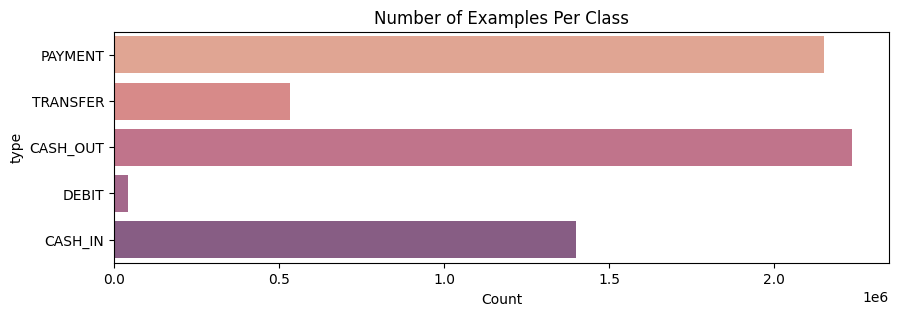

In [11]:
plt.figure(figsize=(10,3))
sns.countplot(y=online_pay['type'], palette="flare", alpha=0.8)
plt.xlabel('Count')
plt.title('Number of Examples Per Class')

In [11]:
online_pay['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Payment type Fraud count')

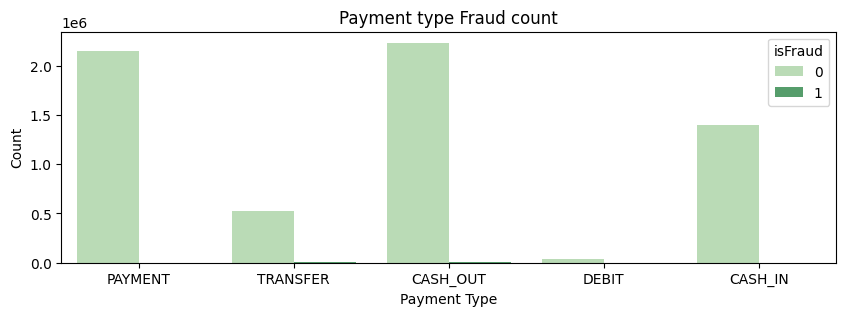

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(x=online_pay['type'], hue=online_pay['isFraud'], palette='Greens', alpha=0.9)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment type Fraud count')

In [23]:
online_pay.drop(['isFlaggedFraud'],axis = 1, inplace = True)

In [24]:
# Payment type Integer encode
label_encoder = LabelEncoder()
online_pay['type'] = label_encoder.fit_transform(online_pay['type'])


In [25]:

online_pay

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


Text(0.5, 1.0, 'Payment type Fraud count')

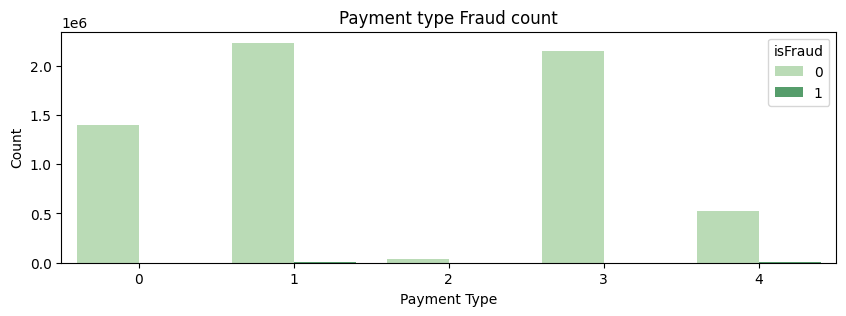

In [26]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

# sns.histplot(online_pay['newbalanceOrig'], kde=True, ax=axes[0], bins=50)
# axes[0].set_title('Distribution of Origin Balance')

# sns.histplot(online_pay['newbalanceDest'], kde=True, ax=axes[1], bins=50)
# axes[1].set_title('Distribution of Destination Balance')

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10,3))
sns.countplot(x=online_pay['type'], hue=online_pay['isFraud'], palette='Greens', alpha=0.9)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment type Fraud count')


<ipython-input-82-09a2f505fffd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = online_pay.corr()


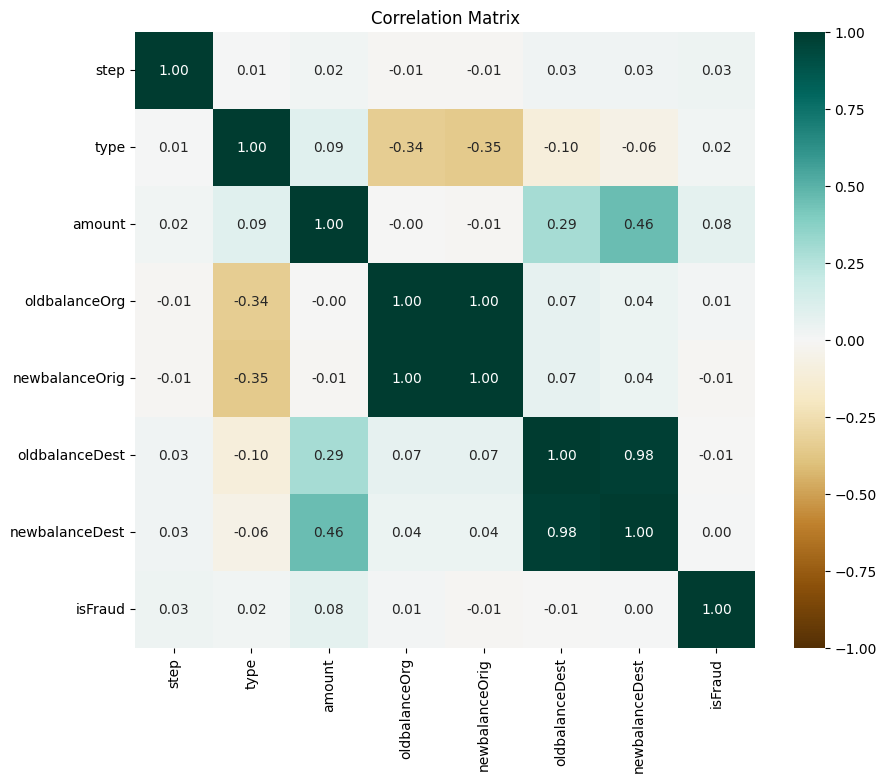

In [82]:
# Compute the correlation matrix
cm = online_pay.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="BrBG", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [28]:
online_pay[online_pay['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,4,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
251,1,4,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
252,1,1,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
680,1,4,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1


In [43]:
online_pay[(online_pay['type'] == 'DEBIT') & (online_pay['isFraud'] == 1)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [14]:
online_pay['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [44]:
online_pay['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [27]:
online_pay[(online_pay['nameDest'] == 'C1286084959') & (online_pay['isFraud'] == 0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
93,1,4,583848.46,C1839168128,0.00,0.00,C1286084959,667778.00,2107778.11,0
367,1,4,176334.26,C169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0
388,1,1,373068.26,C1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0
471,1,0,403418.39,C848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0
642,1,0,222126.95,C870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0
...,...,...,...,...,...,...,...,...,...,...
4810092,346,1,84205.39,C86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0
4832993,347,1,235564.75,C1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0
5566959,393,0,119568.31,C1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0
5596560,394,1,381887.53,C1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0


In [29]:
online_pay.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

##Splitting data into train, test and validation set

In [35]:
target = online_pay['isFraud']

In [36]:
features = online_pay[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']]

In [37]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and temporary sets with stratification
X_train, x_test1, y_train, y_test1 = train_test_split(features, target, test_size=0.25, stratify=target, random_state=0)

# Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, stratify = y_test1, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((4771965, 7), (795327, 7), (795328, 7))

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training set
# scaler.fit(X_train)

# # Transform the datasets
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

## Normalising data

In [43]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = min_max_scaler.fit_transform(X_train.copy())
X_test_scaled = min_max_scaler.transform(X_test.copy())
X_val_scaled = min_max_scaler.transform(X_val.copy())

In [44]:
X_train_scaled

array([[5.39083558e-01, 2.50000000e-01, 3.28950555e-03, ...,
        0.00000000e+00, 4.67416739e-03, 6.23500976e-03],
       [3.35579515e-01, 0.00000000e+00, 1.98427719e-03, ...,
        8.74342454e-02, 2.45199780e-02, 2.39937154e-02],
       [2.49326146e-01, 2.50000000e-01, 5.09666036e-04, ...,
        0.00000000e+00, 1.23664989e-03, 2.98502314e-03],
       ...,
       [4.82479784e-01, 7.50000000e-01, 4.98329196e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.66037736e-02, 2.50000000e-01, 6.38364435e-04, ...,
        0.00000000e+00, 3.07456618e-02, 3.08972439e-02],
       [2.69541779e-01, 0.00000000e+00, 3.76697879e-03, ...,
        3.42331925e-02, 1.81061054e-03, 8.32069235e-04]])

In [45]:
X_val_scaled

array([[4.04312668e-01, 2.50000000e-01, 5.06931885e-03, ...,
        0.00000000e+00, 6.70878183e-02, 6.83727733e-02],
       [3.11320755e-01, 0.00000000e+00, 6.52633596e-04, ...,
        7.19446870e-02, 7.90057659e-04, 6.20305681e-04],
       [5.39083558e-01, 1.00000000e+00, 6.56233706e-03, ...,
        0.00000000e+00, 1.20534519e-03, 2.90803183e-03],
       ...,
       [2.42587601e-01, 0.00000000e+00, 4.94710741e-04, ...,
        9.70772427e-04, 0.00000000e+00, 0.00000000e+00],
       [1.75202156e-02, 2.50000000e-01, 5.12067991e-04, ...,
        0.00000000e+00, 2.48609129e-04, 3.81401160e-04],
       [3.35579515e-01, 7.50000000e-01, 2.56998834e-04, ...,
        3.51441924e-03, 0.00000000e+00, 0.00000000e+00]])

In [61]:
y_val.shape

(795327,)

### Build Isolation Forest Model

In [70]:
# Initialize the Isolation Forest model
model_IF = IsolationForest(n_estimators=100, contamination=0.1, random_state=0)

# Train the model
model_IF.fit(X_train_scaled)

# Predict anomalies on the validation set
y_val_pred = model_IF.predict(X_val_scaled)

In [71]:
y_temp = y_val_pred

In [72]:
y_val_pred

array([-1,  1,  1, ...,  1,  1,  1])

#### Evaluate the model

In [73]:
# convert the predicted anomalies (-1) to values as in online_pay['isFraud'] = 1
# convert the predicted non - anomalies (1) to values as in online_pay['isFraud'] = 0
#y_val_pred = [0 for x in y_val_pred if x == 1]
#y_val_pred = [1 for x in y_val_pred if x == -1]

y_val_pred = [1 if value == -1 else 0 for value in y_val_pred]

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix

array([[714961,  79340],
       [   553,    473]])

In [74]:
accuracy_score(y_val, y_val_pred)

0.8995469787898562

Text(0.5, 3.722222222222216, 'Predicted label')

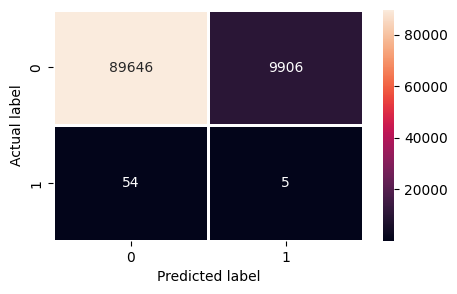

In [77]:
## Model Evaluation

plt.figure(figsize=(5,3))
y_actu = pd.Series(y_val, name='Actual')
y_pred = pd.Series(y_val_pred, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Build an Auto Encoder Model

In [83]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units

  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [86]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_scaled, x_val_scaled)
)

Epoch 1/20
9321/9321 [==============================] - 76s 8ms/step - loss: 0.0016 - mse: 0.0025 - val_loss: 7.5693e-04 - val_mse: 9.9125e-04
Epoch 2/20
9321/9321 [==============================] - 74s 8ms/step - loss: 5.0174e-04 - mse: 7.2584e-04 - val_loss: 9.5445e-05 - val_mse: 1.5199e-04
Epoch 3/20
9321/9321 [==============================] - 78s 8ms/step - loss: 1.5325e-04 - mse: 2.6545e-04 - val_loss: 1.0350e-04 - val_mse: 1.7278e-04
Epoch 4/20
9321/9321 [==============================] - 78s 8ms/step - loss: 1.4043e-04 - mse: 2.4315e-04 - val_loss: 1.1360e-04 - val_mse: 1.8438e-04
Epoch 5/20
9321/9321 [==============================] - 74s 8ms/step - loss: 1.3549e-04 - mse: 2.3367e-04 - val_loss: 1.2780e-04 - val_mse: 2.1414e-04
Epoch 6/20
9321/9321 [==============================] - 97s 10ms/step - loss: 1.3340e-04 - mse: 2.2943e-04 - val_loss: 1.1980e-04 - val_mse: 2.0519e-04
Epoch 7/20
9321/9321 [==============================] - 85s 9ms/step - loss: 1.2910e-04 - mse: 2.2204

#### Plot History

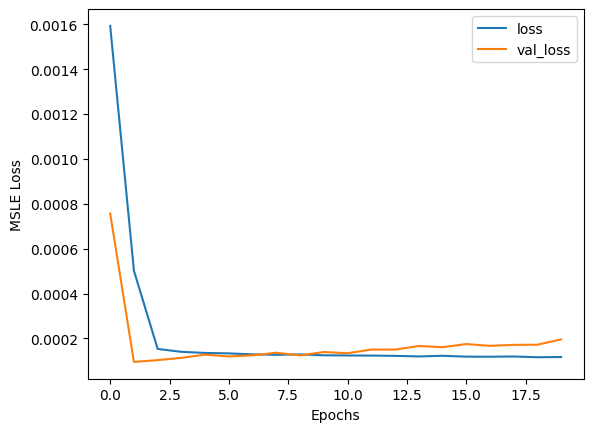

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

#### Find Threshold

In [88]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, x_train_scaled):
  # another method to find threshold
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 1 = anomaly, 0 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

#### Tuning an AutoEncoder using Keras Tuner

In [90]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.5 MB/s eta 0:00:00


In [93]:
import kerastuner as kt

class AutoEncoderTuner(Model):

  def __init__(self, hp, output_units, code_size=8):
    super().__init__()
    dense_1_units = hp.Int('dense_1_units', min_value=16, max_value=72, step=4)
    dense_2_units = hp.Int('dense_2_units', min_value=16, max_value=72, step=4)
    dense_3_units = hp.Int('dense_3_units', min_value=16, max_value=72, step=4)
    dense_4_units = hp.Int('dense_4_units', min_value=16, max_value=72, step=4)
    dense_5_units = hp.Int('dense_5_units', min_value=16, max_value=72, step=4)
    dense_6_units = hp.Int('dense_6_units', min_value=16, max_value=72, step=4)

    self.encoder = Sequential([
      Dense(dense_1_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_2_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_3_units, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(dense_4_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_5_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_6_units, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


def build_model(hp):
  model = AutoEncoderTuner(hp, 7)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(
      loss='msle',
      optimizer=Adam(learning_rate=hp_learning_rate),
  )
  return model

In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='autoencoder',
    project_name='tuning_autoencoder6'
)

tuner.search(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_scaled, x_val_scaled)
)

Trial 7 Complete [00h 05m 38s]
val_loss: 8.118998084682971e-05

Best val_loss So Far: 6.742874393239617e-05
Total elapsed time: 00h 25m 55s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
72                |44                |dense_1_units
72                |56                |dense_2_units
20                |64                |dense_3_units
68                |32                |dense_4_units
40                |56                |dense_5_units
64                |36                |dense_6_units
0.01              |0.001             |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
9321/9321 [==============================] - 107s 11ms/step - loss: 3.7725e-04 - val_loss: 1.2686e-04
Epoch 2/3
9321/9321 [==============================] - 106s 11ms/step - loss: 1.9349e-04 - v

In [ ]:
hparams = [f'dense_{i}_units' for i in range(1,7)] + ['learning_rate']
best_hyperparams = tuner.get_best_hyperparameters()
for hps in hparams:
  print(f"{hps}: {best_hyperparams[0][hps]}")

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.compile(loss='msle', optimizer=Adam(0.001))

best_model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_val_scaled, x_val_scaled)
)

In [ ]:
threshold_ = find_threshold(best_model, x_train_scaled)
preds_ = get_predictions(best_model, x_test_scaled, threshold_)
accuracy_score(preds_, y_test)

#### Serialization

In [ ]:
dataset_name='onl_pay'
saved_model_path='/content/drive/MyDrive/Saved_Model/{}_data'.format(dataset_name.replace('/','_'))

model.save(saved_model_path,include_optimizer=False)

#### DeSerialization

In [ ]:
reloaded_model=tf.saved_model.load('/content/drive/MyDrive/Saved_Model/onl_pay_data')